<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part7/P7_Ch03_CH05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 여러 의상 사진에서 옷 종류 구분하기 - FashionMNIST
### Data resource : https://www.kaggle.com/datasets/zalando-research/fashionmnist

### 목표
- fashion mnist image classification
- multi class와 multi label 구분
    - multi class : 하나의 사진 속 하나의 객체 가정
    - multi label : 하나의 사진 속 여러 객체 가능

- 이미지 확장
- 이미지 객체 삽입

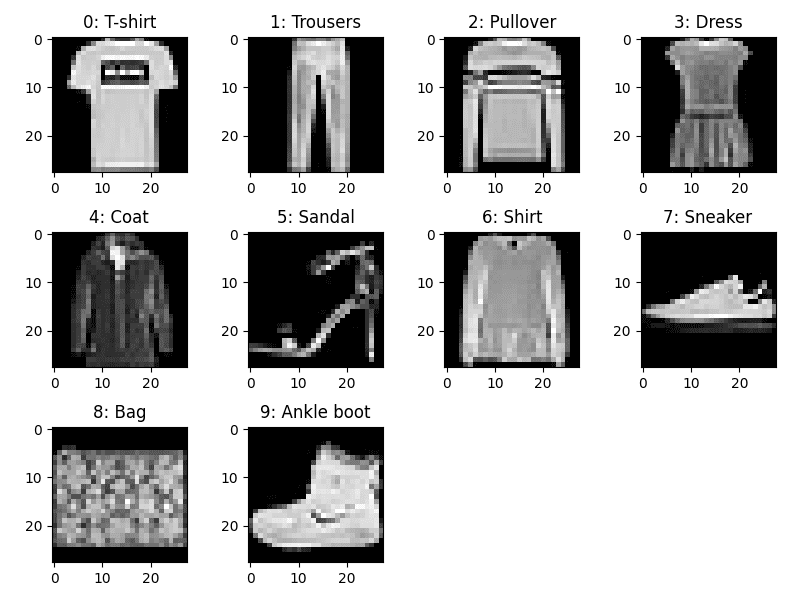


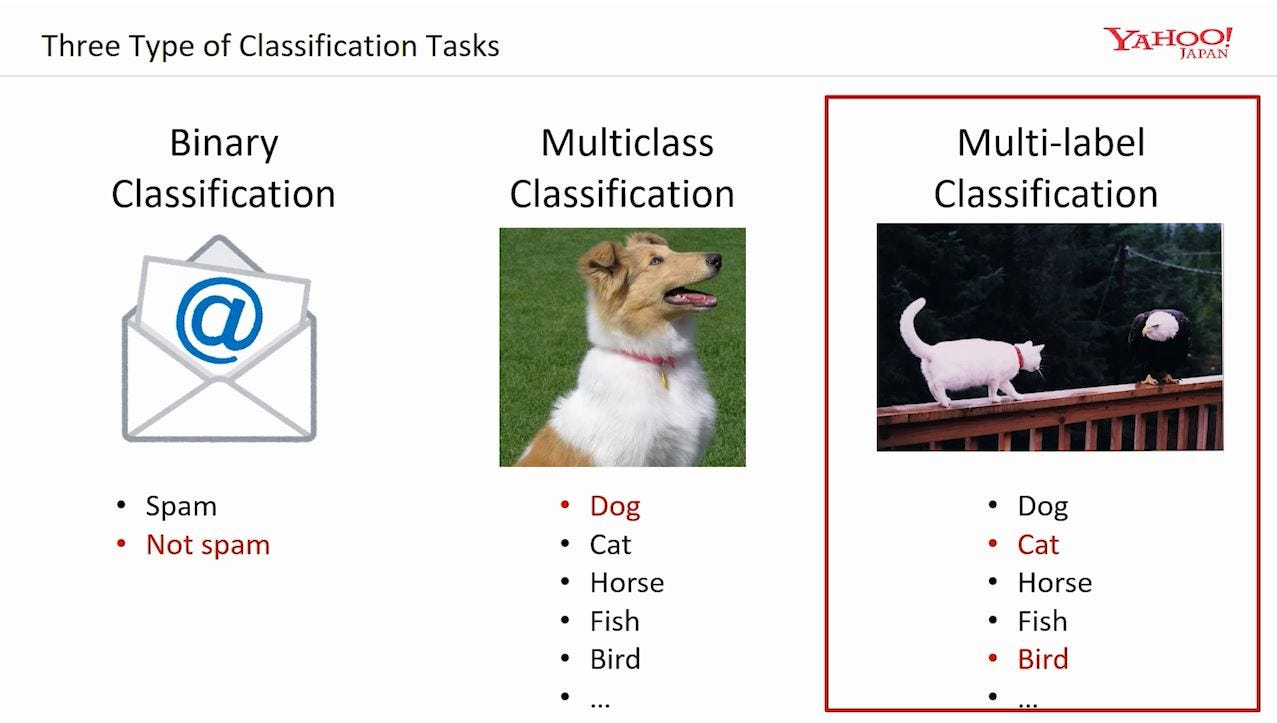

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

## 1. EDA

In [2]:
# load fashion_mnist dataset

fashion_mnist = keras.datasets.fashion_mnist
((train_images, train_labels), (test_images, test_labels)) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
print(f"train_images.shape : {train_images.shape}")
print(f"train_labels.shape : {train_labels.shape}")
print(f"test_images.shape : {test_images.shape}")
print(f"test_labels.shape : {test_labels.shape}")

train_images.shape : (60000, 28, 28)
train_labels.shape : (60000,)
test_images.shape : (10000, 28, 28)
test_labels.shape : (10000,)


In [4]:
labels = ["T-shirt/top", # index 0
            "Trouser",# index 1
            "Pullover",# index 2
            "Dress",# index 3
            "Coat",# index 4
            "Sandal",# index 5
            "Shirt",# index 6
            "Sneaker",# index 7
            "Bag",# index 8
            "Ankle boot"# index 9
            ]

def idx2label(idx):
    return labels[idx]

In [5]:
idx2label(test_labels[0])

'Ankle boot'

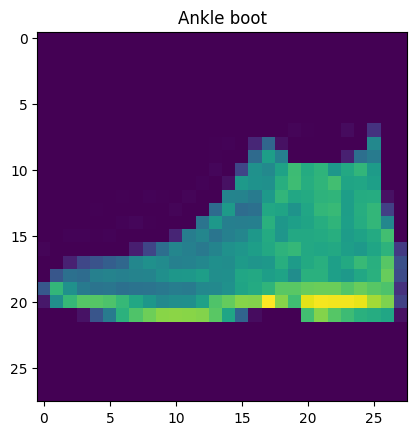

In [6]:
plt.imshow(test_images[0])
plt.title(idx2label(test_labels[0]))
plt.show()

In [7]:
def show(idx):
    plt.imshow(train_images[idx], cmap = 'gray')
    plt.title(idx2label(train_labels[idx]))
    plt.show()

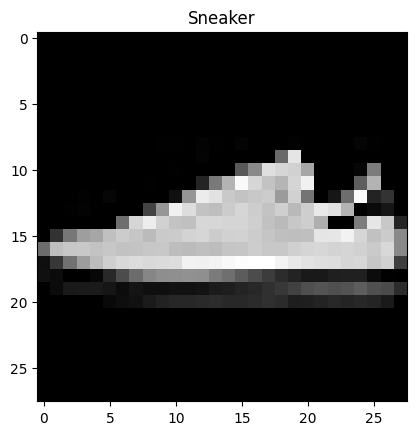

In [8]:
show(6)

In [9]:
train_images[train_images !=0][:5]

array([ 1, 13, 73,  1,  4], dtype=uint8)

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
print(train_images.reshape((60000, -1)).shape)
print(train_images.reshape((60000, -1)).sum())
print(train_images.reshape((60000, -1)).sum(axis = 1).shape)
print(train_images.reshape((60000, -1)).sum(axis = 1)[0])

## 이미지 크기 가장 큰/작은것 확인
print(train_images.reshape((60000, -1)).sum(axis = 1).argmax())
print(train_images.reshape((60000, -1)).sum(axis = 1).argmin())


(60000, 784)
3431114169
(60000,)
76247
55023
9230


In [12]:
print(train_images.reshape((60000, -1)).sum(axis = 1)[55023])
print(train_images.reshape((60000, -1)).sum(axis = 1)[9230])

150387
3876


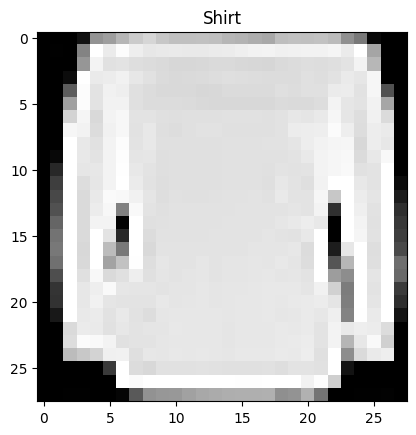

In [13]:
show(55023)

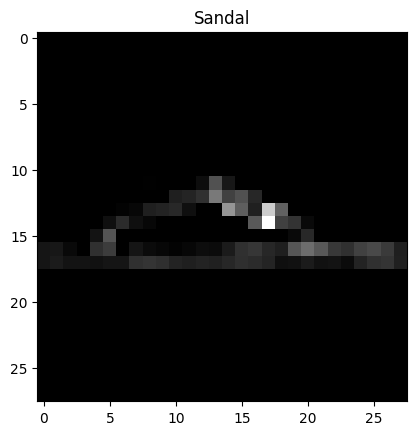

In [14]:
show(9230)

## 2. Preprocessing

In [15]:
# train/test image data의 범위 확인

# print(f"train_images : {list(filter(lambda x : x!=0, train_images[1000].reshape(-1)))[:10]}")
# print(f"test_images : {list(filter(lambda x : x!=0, test_images[1000].reshape(-1)))[:10]}") ## 느림

print(f"train_images : {train_images[train_images != 0][:10]}")
print(f"test_images : {test_images[test_images != 0][:10]}") ## 빠름

print(f"train_images : {train_images.shape}")
print(f"train_images : {test_images.shape}")

print(f"train_images : {train_images.dtype}")
print(f"train_images : {test_images.dtype}")

train_images : [  1  13  73   1   4   1   1   3  36 136]
test_images : [  3   1   7  37   1   2  27  84  11 119]
train_images : (60000, 28, 28)
train_images : (10000, 28, 28)
train_images : uint8
train_images : uint8


In [16]:
# train/test 이미지 데이터의 최소/최대 값 출력

print(train_images.min(), train_images.max())
print(test_images.min(), test_images.max())

print(train_labels.min(), train_labels.max())
print(test_labels.min(), test_labels.max())

0 255
0 255
0 9
0 9


In [17]:
print(train_images.dtype)
print(test_images.dtype)

uint8
uint8


In [18]:
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)

In [19]:
print(train_images.dtype)
print(test_images.dtype)

print(train_images.min(), train_images.max())
print(test_images.min(), test_images.max())


float64
float64
0.0 255.0
0.0 255.0


### Data Normalize(0-1)

In [20]:
print((train_images/255.0).min(), (train_images/255.0).max())

0.0 1.0


In [21]:
def norm(data):
    min_v = data.min()
    max_v = data.max()
    return (data - min_v)/(max_v - min_v)

In [22]:
norm(train_images).min(), norm(train_images).max()

(0.0, 1.0)

In [23]:
train_images = norm(train_images)
test_images = norm(test_images)

In [24]:

print(train_images.min(), train_images.max())
print(test_images.min(), test_images.max())


0.0 1.0
0.0 1.0


In [25]:
print(f"train_images : {train_images[train_images != 0][:10]}")
print(f"test_images : {test_images[test_images != 0][:10]}") ## 빠름

print(f"train_images : {train_images.shape}")
print(f"train_images : {test_images.shape}")

print(f"train_images : {train_images.dtype}")
print(f"train_images : {test_images.dtype}")

train_images : [0.00392157 0.05098039 0.28627451 0.00392157 0.01568627 0.00392157
 0.00392157 0.01176471 0.14117647 0.53333333]
test_images : [0.01176471 0.00392157 0.02745098 0.14509804 0.00392157 0.00784314
 0.10588235 0.32941176 0.04313725 0.46666667]
train_images : (60000, 28, 28)
train_images : (10000, 28, 28)
train_images : float64
train_images : float64


## 3. 시각화


In [26]:
train_images[:5].shape

(5, 28, 28)

In [27]:
np.hstack(train_images[:5]).shape

(28, 140)

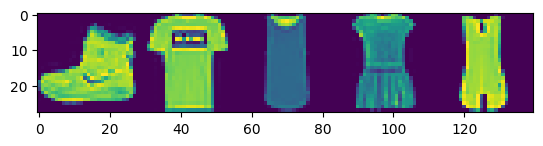

In [28]:
plt.imshow(np.hstack(train_images[:5]))

In [29]:
train_images[:5].transpose(1,0,2).reshape(28,-1).shape

(28, 140)

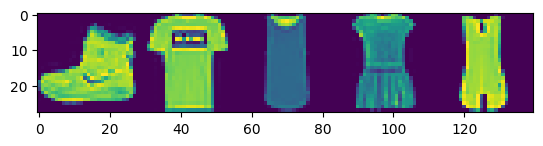

In [30]:
plt.imshow(train_images[:5].transpose(1,0,2).reshape(28,-1))

In [31]:
## 같은 라벨의 이미지들끼리 출력하는 함수

def filter(label, count = 5):
    plt.imshow(train_images[np.argwhere(train_labels == label)[:count,...,0]].transpose(1,0,2).reshape(28,-1))
    plt.title(idx2label(label))

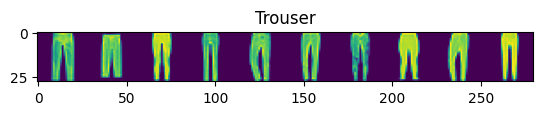

In [32]:
filter(1,10)

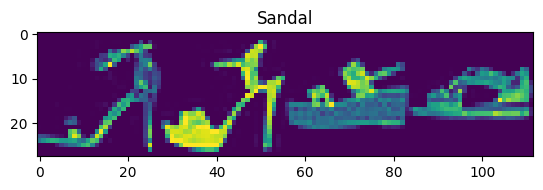

In [33]:
filter(5,4)

## 4. Data augmentation - 이미지 확대 및 multilabel문제로 변환

In [34]:
## 이미지 4배로 확대

def expand_4times(img):
    bg = np.zeros(img.shape) # background
    idx = np.random.randint(0,4)

    slots = [bg, bg, bg, bg]
    slots[idx] = img

    expanded = np.vstack([
        np.hstack(slots[:2]),
        np.hstack(slots[2:]),
    ])

    return expanded


In [35]:
expand_4times(train_images[1]).shape

(56, 56)

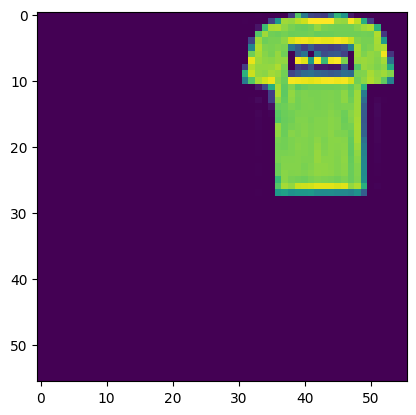

In [36]:
plt.imshow(expand_4times(train_images[1]))

In [37]:
train_expand_images = np.array([expand_4times(img) for img in train_images])
test_expand_images = np.array([expand_4times(img) for img in test_images])

In [38]:
train_expand_images.shape, test_expand_images.shape

((60000, 56, 56), (10000, 56, 56))

In [39]:
## 4분면을 랜덤 객체(0-4개)로 채우기


def expand_4times2(x_data, y_data):
    images, labels = [], []

    for _ in range(4):

        bg = np.zeros((28,28)) # background
        obj_count = np.random.randint(0,5)
        label = np.zeros((10, ))
        slots = [bg, bg, bg, bg]

        for idx in range(obj_count):
            i = np.random.randint(len(x_data))
            slots[idx] = x_data[i]
            label += tf.keras.utils.to_categorical(y_data[i], 10)
        np.random.shuffle(slots)

    new_img = np.vstack([
        np.hstack(slots[:2]),
        np.hstack(slots[2:]),
    ])
    images.append(new_img)
    labels.append((label >=1 ).astype(np.int))

    return np.array(images), np.array(labels)


In [40]:
expand_4times2(train_images, train_labels)[0].shape

(1, 56, 56)

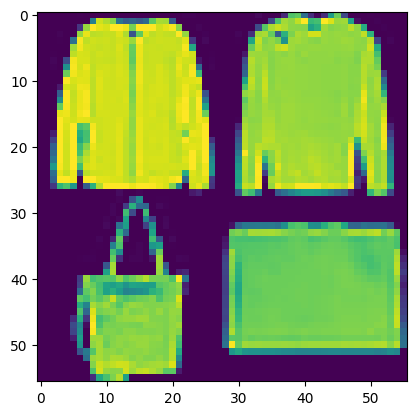

In [41]:
plt.imshow(expand_4times2(train_images, train_labels)[0][0])

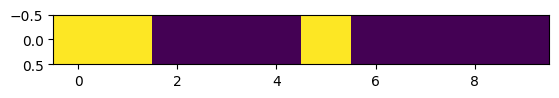

In [42]:
plt.imshow(expand_4times2(train_images, train_labels)[1])

In [43]:
## train, test data에 대해 expand_4times2적용

train_multi_images, train_multi_labels = list(zip(*[expand_4times2(train_images, train_labels) for i in train_images]))
test_multi_images, test_multi_labels = list(zip(*[expand_4times2(test_images, test_labels) for i in test_images]))


In [44]:
print(np.array(train_multi_images).shape)
print(np.array(train_multi_labels).shape)

(60000, 1, 56, 56)
(60000, 1, 10)


In [45]:
# np.array(train_multi_images)[:,0,...].reshape(-1, 56, 56, 1) -> (60000, 56, 56, 1)
# np.array(train_multi_labels)[:,0,...] -> (60000, 10, 1)

train_multi_images = np.array(train_multi_images)[:,0,...].reshape(-1, 56, 56, 1)
train_multi_labels = np.array(train_multi_labels)[:,0,...]

test_multi_images = np.array(test_multi_images)[:,0,...].reshape(-1, 56, 56, 1)
test_multi_labels = np.array(test_multi_labels)[:,0,...]

In [46]:
train_multi_images.shape, train_multi_labels.shape
test_multi_images.shape, test_multi_labels.shape

((10000, 56, 56, 1), (10000, 10))

In [47]:
## 개수에 따라 연속된 그림 plot
# 한공간에 다른 클래스 obj_count개 (obj_count =2 : 티셔츠 2개, 가방 1도 같은 취급) -> count장 출력
def filter2(obj_count, count = 5):
    labels = train_multi_labels.sum(axis = 1) # 하나의 이미지속 클래스 수

    ids = np.argwhere(labels == obj_count)[:count,0] # 하나의 이미지속 클래스 수가 obj_count개인 이미지들을 count수만큼 idx찾기
                                                     # -> array([ 0,  5,  8, 30, 36])

    imgs = train_multi_images[ids][...,0].transpose((1,0,2)).reshape((56,-1)) # 이미지들 가로로 연장
    plt.imshow(imgs)
    plt.show()



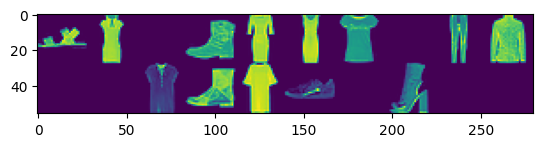

In [48]:
filter2(2,5)

In [49]:
train_labels[0]

9

In [50]:
tf.keras.utils.to_categorical(train_labels[0], 10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [51]:
train_multi_labels[2]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<BarContainer object of 10 artists>

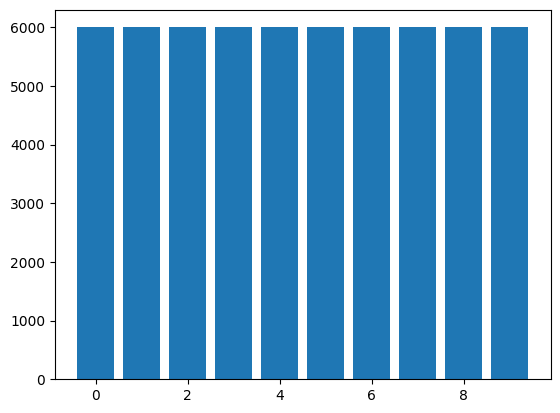

In [52]:
### label 분포 plot
plt.bar(np.arange(10), tf.keras.utils.to_categorical(train_labels).sum(axis =0))

<BarContainer object of 10 artists>

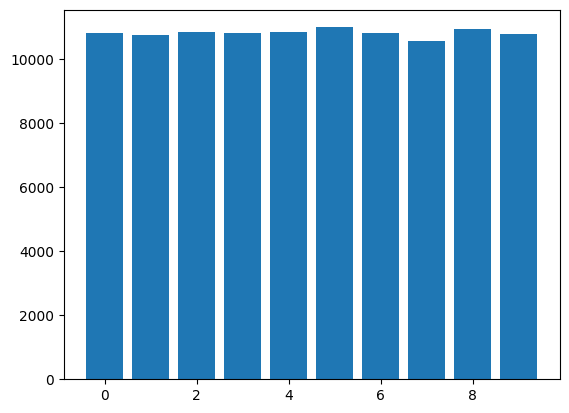

In [53]:
plt.bar(np.arange(10), train_multi_labels.sum(axis =0))

(array([12065.,     0., 13403.,     0.,     0., 14700.,     0., 13854.,
            0.,  5978.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

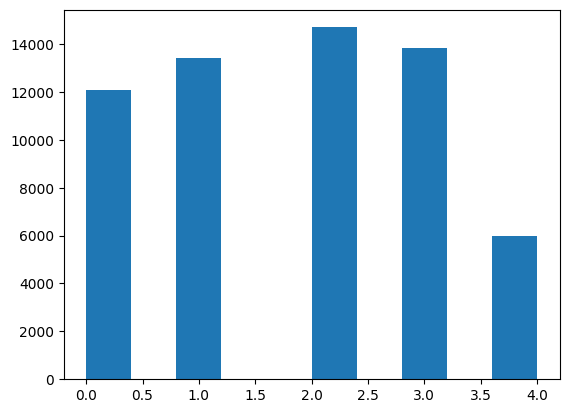

In [54]:
plt.hist(train_multi_labels.sum(axis =1))

## 5. Transfer Learning : Multi class -> Multi Label


In [55]:
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Flatten, GlobalAvgPool2D
from keras.models import Model

def single_fashion_mnist_model():
    inputs = Input((56, 56, 1))
    x = Conv2D(16, 2, padding = 'same', activation = 'relu')(inputs)
    x = MaxPool2D(2)(x)
    x = Dropout(0.3)(x)

    x = Conv2D(32, 2, padding = 'same', activation = 'relu')(x)
    x = MaxPool2D(2)(x)
    x = Dropout(0.3)(x)

    x = Conv2D(64, 2, padding = 'same', activation = 'relu')(x)
    x = MaxPool2D(2)(x)
    x = Flatten()(x)
    x = Dense(10, activation = 'softmax')(x)
    return Model(inputs, x)


In [56]:
def single_fashion_mnist_model2():
    inputs = Input((56, 56, 1))
    x = Conv2D(16, 2, padding = 'same', activation = 'relu')(inputs)
    x = MaxPool2D(2)(x)
    x = Dropout(0.3)(x)

    x = Conv2D(32, 2, padding = 'same', activation = 'relu')(x)
    x = MaxPool2D(2)(x)
    x = Dropout(0.3)(x)

    x = Conv2D(64, 2, padding = 'same', activation = 'relu')(x)
    x = MaxPool2D(2)(x)
    x = GlobalAvgPool2D()(x)
    x = Flatten()(x)
    x = Dense(10, activation = 'softmax')(x)
    return Model(inputs, x)


In [57]:
model = single_fashion_mnist_model()

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 56, 56, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 16)        80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 28, 28, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                        

In [58]:
model = single_fashion_mnist_model2()

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 56, 56, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 16)        80        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 28, 28, 16)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 28, 28, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        2080      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                      

In [59]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [60]:
hist = model.fit(train_expand_images.reshape((-1, 56, 56, 1)),
                 tf.keras.utils.to_categorical(train_labels, 10),
                 validation_data = (test_expand_images.reshape((-1, 56, 56, 1)),
                                    tf.keras.utils.to_categorical(test_labels, 10)),
                 epochs = 15,
                 verbose = 1
                 )

Epoch 1/15
1875/1875 [==============================] - 20s 5ms/step - loss: 1.4598 - accuracy: 0.4537 - val_loss: 1.1120 - val_accuracy: 0.5957
Epoch 2/15
1875/1875 [==============================] - 8s 5ms/step - loss: 1.0079 - accuracy: 0.6242 - val_loss: 0.8991 - val_accuracy: 0.6812
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8631 - accuracy: 0.6808 - val_loss: 0.7996 - val_accuracy: 0.7146
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7870 - accuracy: 0.7077 - val_loss: 0.7539 - val_accuracy: 0.7389
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7310 - accuracy: 0.7282 - val_loss: 0.7473 - val_accuracy: 0.7326
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6981 - accuracy: 0.7422 - val_loss: 0.6474 - val_accuracy: 0.7676
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6702 - accuracy: 0.7527 - val_loss: 0.6304 - val_accuracy

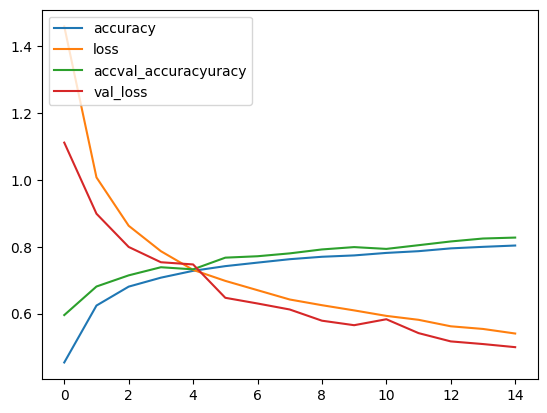

In [61]:
plt.plot(hist.history['accuracy'], label = 'accuracy')
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_accuracy'], label = 'accval_accuracyuracy')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.legend(loc = 'upper left')
plt.show()